# EDA
stock_price.csvのEDAを行う．


In [ ]:
# ライブラリのインポート
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mticker
import japanize_matplotlib
import seaborn as sns

In [ ]:
# データの読み込み
df = pd.read_csv("/content/stock_price.csv")

In [ ]:
# プログラムで扱いやすいようカラム名を英語に変更

# 日本語名と英語名の対応を定義
column_mapping = {
    '日付け': 'Date',
    '終値': 'Close',
    '始値': 'Open',
    '高値': 'High',
    '安値': 'Low',
    '出来高': 'Volume',
    '変化率 %': 'Change_Percentage'
}

# renameメソッドを使ってカラム名を変更
df.rename(columns=column_mapping, inplace=True)

In [ ]:
# 分析しやすくするためデータ型を変更


# Dateをdatatime型にする
df['Date'] = pd.to_datetime(df['Date'])


# Volumeの末尾の文字をとり、数値データにする
def convert_volume(volume_str):
    if isinstance(volume_str, str):
        volume_str = volume_str.strip()  # 余分な空白を削除
        if volume_str.endswith('M'):
            # 'M'で終わる場合は、'M'を削除して100万を掛ける
            return float(volume_str[:-1]) * 1_000_000
        elif volume_str.endswith('B'):
            # 'B'で終わる場合は、'B'を削除して10億を掛ける
            return float(volume_str[:-1]) * 1_000_000_000
    # 文字列でない場合は、そのまま数値に変換する
    return float(volume_str)

# 元の'出来高'列に関数を適用して、列全体を数値に変換する
df['Volume'] = df['Volume'].apply(convert_volume)


# Change_Percentageを数値データに変換
df['Change_Percentage'] = df['Change_Percentage'].str.replace('%', '').astype(float)

## 1.データの概要把握

In [ ]:
df

,Date,Close,Open,High,Low,Volume,Change_Percentage
0,2024-08-01,156.3,159.3,159.4,156.1,7.915000e+07,-2.56
1,2024-07-31,160.4,158.2,160.7,158.1,1.739100e+08,1.07
2,2024-07-30,158.7,158.8,159.2,158.0,1.381400e+08,-0.63
3,2024-07-29,159.7,158.7,160.2,158.4,1.262800e+08,1.14
4,2024-07-26,157.9,159.3,159.6,157.9,1.550800e+08,-0.13
...,...,...,...,...,...,...,...
9197,1987-02-18,191.2,186.3,191.2,186.3,7.950900e+08,4.82
9198,1987-02-17,182.4,176.5,184.3,175.5,8.815100e+08,3.93
9199,1987-02-16,175.5,166.7,175.5,165.7,3.605100e+08,1.74
9200,1987-02-13,172.5,176.5,176.5,172.5,4.223800e+08,-5.43


In [ ]:
!pip install ydata-profiling

In [ ]:
from ydata_profiling import ProfileReport

In [ ]:
profile = ProfileReport(df, title="Pandas Profiling Report")
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 7/7 [00:00<00:00, 43.80it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## 2.データの可視化

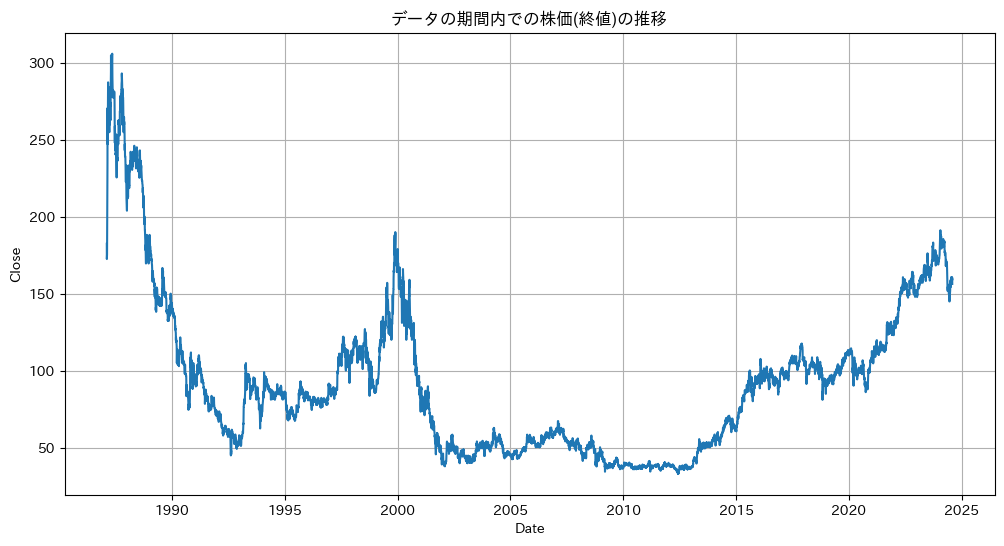

In [ ]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Date', y='Close')
plt.title('データの期間内での株価(終値)の推移')
plt.xlabel('Date')
plt.ylabel('Close')
plt.grid(True)
plt.show()

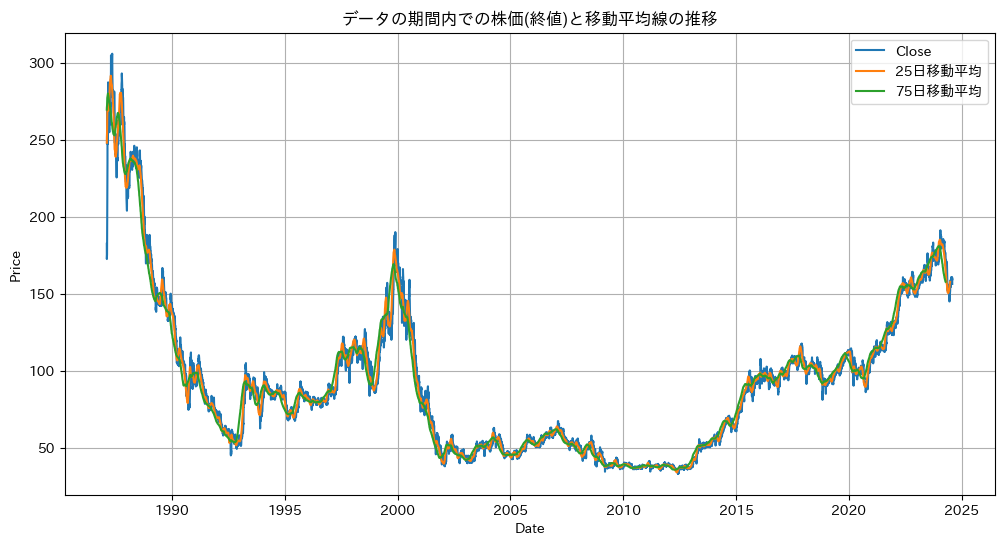

In [ ]:
# 移動平均線を計算
df['25日移動平均'] = df['Close'].rolling(window=25).mean()
df['75日移動平均'] = df['Close'].rolling(window=75).mean()

# 株価、25日移動平均線、75日移動平均線をプロット
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Date', y='Close', label='Close')
sns.lineplot(data=df, x='Date', y='25日移動平均', label='25日移動平均')
sns.lineplot(data=df, x='Date', y='75日移動平均', label='75日移動平均')
plt.title('データの期間内での株価(終値)と移動平均線の推移')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()